<a href="https://colab.research.google.com/github/itssofiarce/MINERIA/blob/tp1/tp1_2024/TP1_Mineria_Arce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Práctico Minería de Datos 2024
## Docentes
- Spetale, Flavio
- Pellerejo, Ivan
- Gatti, Ramiro

## Integrante
- Sofía Arce


# Preparacion del entorno

In [102]:
import os

REPO_NAME = "MINERIA"
if REPO_NAME not in os.getcwd():
  if not os.path.exists(REPO_NAME):
    !git clone https://github.com/itssofiarce/MINERIA.git
  os.chdir(REPO_NAME)

In [103]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Librerías

In [104]:
import pandas as pd
import numpy as np
from tabulate import tabulate
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset:

In [105]:
data = pd.read_csv('/content/MINERIA/tp1_2024/dxCropRecommendation.csv')

# Información del Dataset


In [106]:
data.head()

,Nitrogeno,Fosforo,Potasio,Temperatura,Humedad,pH,Lluvia,Cultivo
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Arroz
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Arroz
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Arroz
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Arroz
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Arroz


In [107]:
# Nombre y total de columnas
print("El dataset tiene:")
columns = data.columns
ncolumns = len(columns)
print(f"{ncolumns} columnas: {', '.join(columns)}")

# Total de filas
nrows = len(data)
print(f"{nrows} filas")

# Valores y rangos
unq_val = {col: data[col].unique() for col in data.columns}
tip_val = data.dtypes

table_data = []
for col, values in unq_val.items():
    dtype = tip_val[col]
    if len(values) > 50:
        # En caso de que haya mas de 50 datos únicos, muestro solamente los primeros 50
        values_to_display = list(values[:50])
        values_display = ', '.join(map(str, values_to_display))
    else:
        values_display = ', '.join(map(str, values))

    table_data.append([col, dtype, values_display])

# Print the table
print(tabulate(table_data, headers=["Column", "Data Type", "Unique Values"], tablefmt="grid"))

El dataset tiene:
8 columnas: Nitrogeno, Fosforo, Potasio, Temperatura, Humedad, pH, Lluvia, Cultivo
1600 filas
+-------------+-------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Column      | Data Type   | Unique Values                                                                                                                                                                     

Descripción de las columnas
* Nitrogeno: Proporcion de Nitrogeno en el suelo (mg/kg)
* Fosforo: Proporcion de Fosforo en el suelo (mg/kg)
* Potasio: Proporcion de Potasio en el suelo (mg/kg)
* Temperatura: Temperatura registrada en grados celsius
* Humedad: porcentaje de humedad registrada
* pH: valor de ph registrado en el suelo
* Lluvia: lluvia registrada en mm
* Cultivo: nombre de la semilla


# Analisis Exploratorio



### Nulos


In [108]:
data.isnull().sum()

,0
Nitrogeno,0
Fosforo,0
Potasio,0
Temperatura,0
Humedad,0
pH,0
Lluvia,0
Cultivo,0


El dataset no contiene registros con valores nulos

### Descripción de las columnas numéricas

In [109]:
data.describe()

,Nitrogeno,Fosforo,Potasio,Temperatura,Humedad,pH,Lluvia
count,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,52.003750,53.145000,57.455625,25.627031,75.299276,6.474024,104.126884
std,35.697954,37.949247,56.440856,5.384785,20.534713,0.658380,56.235890
min,0.000000,5.000000,5.000000,8.825675,14.258040,4.507524,20.211267
25%,23.000000,22.750000,25.000000,22.481574,63.675620,6.034347,66.697864
50%,39.000000,47.000000,40.000000,25.662093,82.281131,6.423214,97.318949
75%,86.000000,71.000000,53.000000,28.568738,91.337228,6.873499,117.947585
max,120.000000,145.000000,205.000000,43.675493,99.981876,8.868741,298.560117


### Outliers

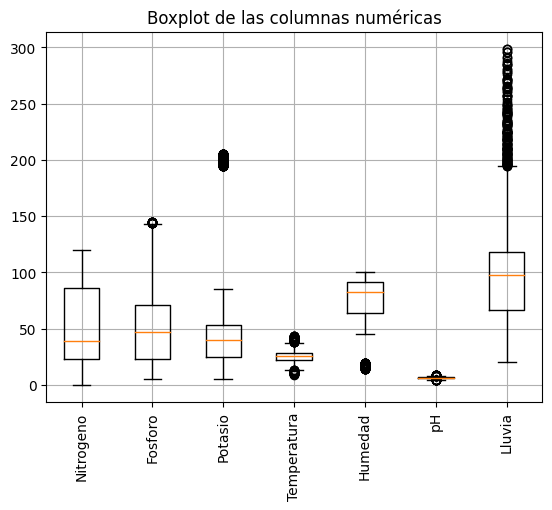

In [110]:
# Now you can create the boxplot.
fig, ax = plt.subplots()
ax.boxplot(data.iloc[:, :-1])
plt.xticks(range(1, len(data.columns)), data.iloc[:, :-1].columns, rotation=90)

plt.title("Boxplot de las columnas numéricas")
plt.grid(True)
plt.show()

Segun el gráfico superior, todas las variables numéricas tienen valores atípicos excepto los valores de Nitrógeno. A continuación estudiaré los outliers para las variables categóricas.

<ipython-input-111-3f4fa223a77f>:9: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-111-3f4fa223a77f>:9: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-111-3f4fa223a77f>:9: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-111-3f4fa223a77f>:9: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-111-3f4fa223a77f>:9: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-111-3f4fa223a77f>:9: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-111-3f4fa223a77f>:9: UserWarning:

FixedFormatter should only be used together with FixedLocator



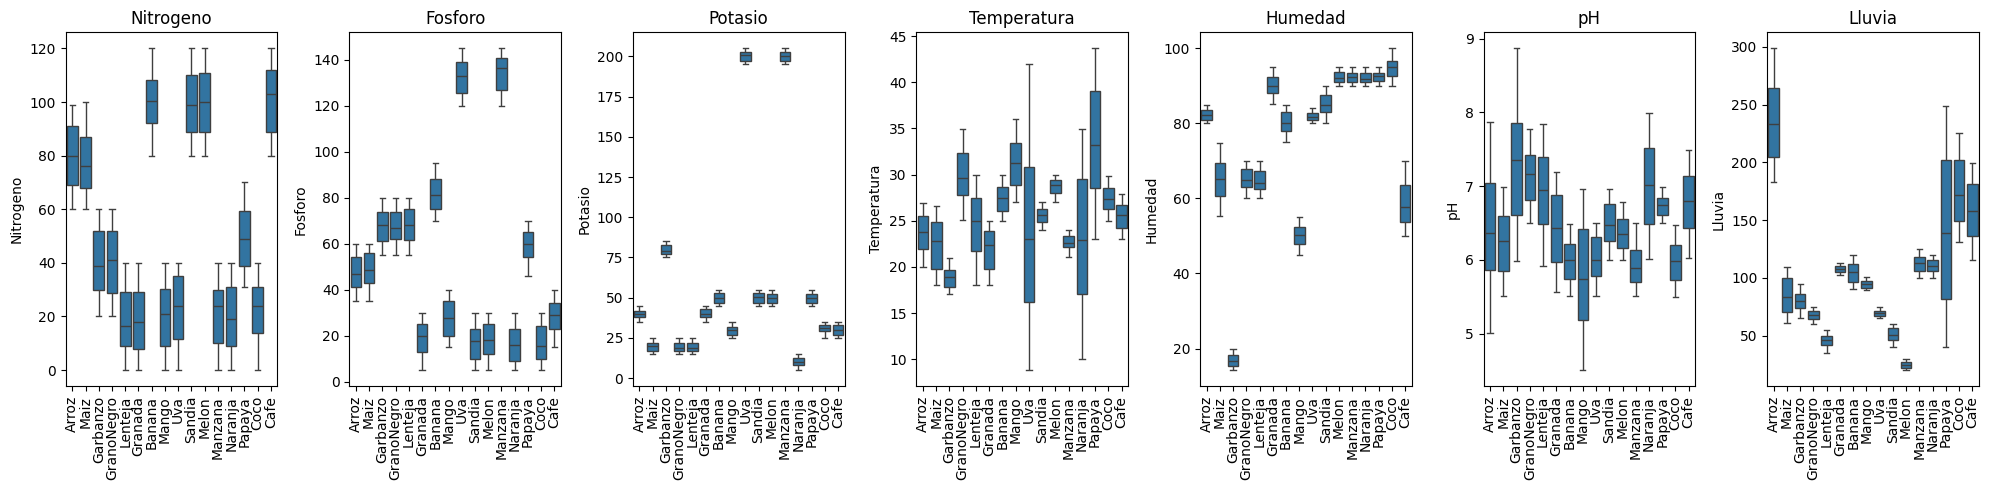

In [111]:
num_vars = len(data.columns[:-1])
fig, axes = plt.subplots(nrows=1, ncols=num_vars, figsize=(20, 5))

# Iterar sobre las variables numéricas
for i, col in enumerate(data.columns[:-1]):
    sns.boxplot(x='Cultivo', y=col, data=data, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)


plt.tight_layout()
plt.show()


En conclusón, aunque los boxplots de las varibles numéricas determinen ciertos datos como outliers no información suficiente para definirlos como tal. Entonces, al plottear cada una de las variables numéricas según las diferentes categorias se observa que cada cultivo tiene sus propias caracteristicas por lo que no son realmente outliers por lo tanto no serán descartados para el cálculo de PCA.

## Distribuciones

In [112]:
columnas_numericas = data.select_dtypes(['int', 'float']).columns
from scipy import stats
for num_col in columnas_numericas:
    _, pval = stats.normaltest(data[num_col])
    if(pval < 0.05):
        print(f"Columna {num_col} no sigue una distribución normal. P-value: {pval}")

Columna Nitrogeno no sigue una distribución normal. P-value: 0.0
Columna Fosforo no sigue una distribución normal. P-value: 1.3109037846248255e-37
Columna Potasio no sigue una distribución normal. P-value: 2.6232179657523847e-117
Columna Temperatura no sigue una distribución normal. P-value: 4.9403553135254025e-12
Columna Humedad no sigue una distribución normal. P-value: 4.24078863412994e-80
Columna pH no sigue una distribución normal. P-value: 1.3792768490363843e-10
Columna Lluvia no sigue una distribución normal. P-value: 4.343708122701068e-56


Con un nivel de confianza del 95% descartamos la normalidad para las variables

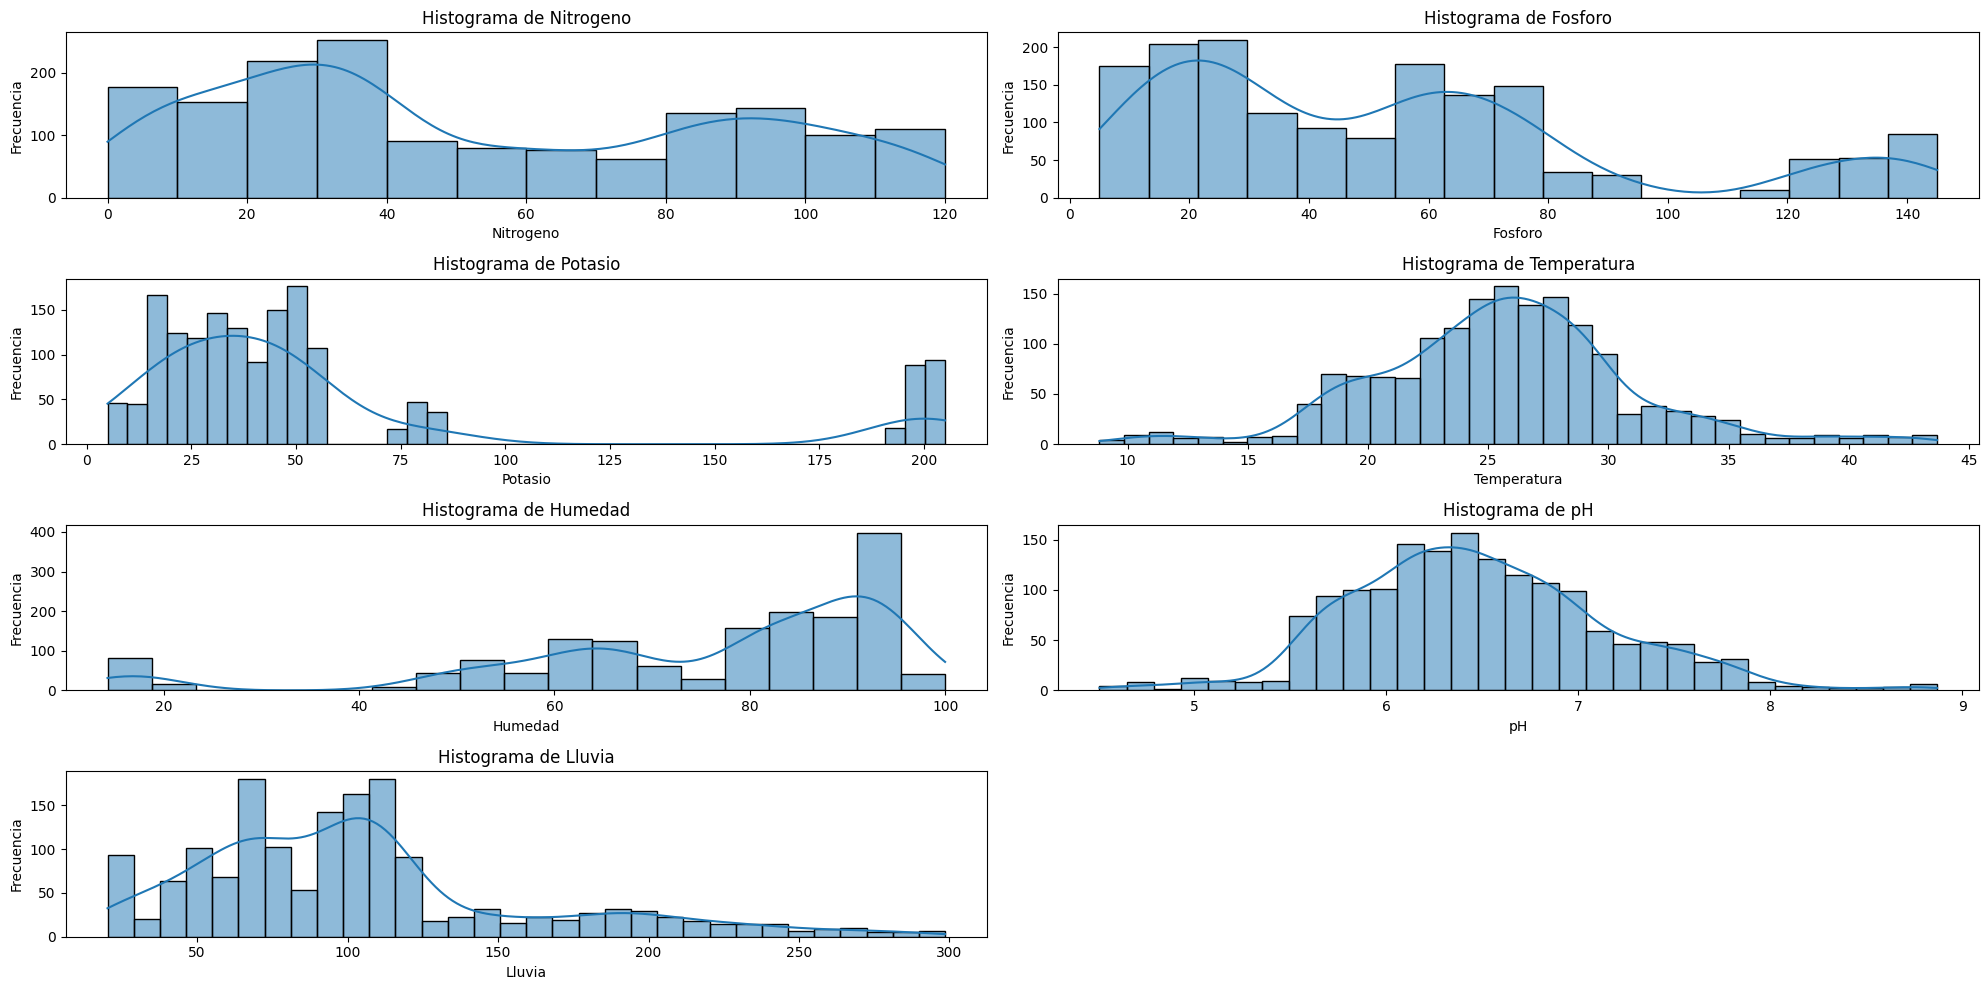

In [113]:
plt.figure(figsize=(20, 10))
for i, col in enumerate(data.iloc[:,:-1], 1):
    plt.subplot(4, 2, i)
    sns.histplot(data[col], kde=True)
    plt.title(f"Histograma de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

Observando los gráficos de arriba, las distribuciones de pH y temperatura concentran la mayoría de los datos en en centro. La distribución de la lluvia es asimetrica hacia la derecha mientras que la de la humedad es asimentrica hacia la izquierda.

## Correlación de las variables numéricas|

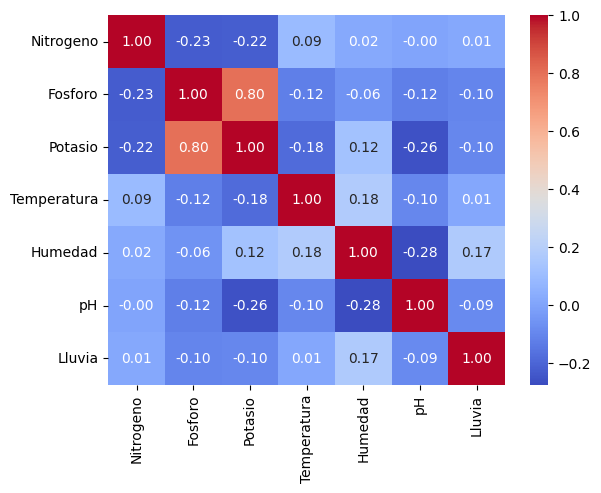

In [114]:
corr_matrix = data.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

Las variables con mayor correlación positiva son el Fósforo y el Potasio.

## Estandarización
Los datos serán normalizados mediante la tecnica de Z-Score.

In [115]:
data_num = data.drop(columns=['Cultivo'])
std_data = (data_num - data_num.mean()) / data_num.std()

In [116]:
std_data.describe()

,Nitrogeno,Fosforo,Potasio,Temperatura,Humedad,pH,Lluvia
count,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03
mean,8.881784e-17,-7.993606e-17,7.105427e-17,-4.085621e-16,-7.105427e-17,-9.769963e-16,8.881784e-18
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.456771e+00,-1.268668e+00,-9.293910e-01,-3.120153e+00,-2.972588e+00,-2.986876e+00,-1.492208e+00
25%,-8.124765e-01,-8.009382e-01,-5.750378e-01,-5.841378e-01,-5.660491e-01,-6.678163e-01,-6.655718e-01
50%,-3.642716e-01,-1.619268e-01,-3.092729e-01,6.511365e-03,3.400026e-01,-7.717530e-02,-1.210603e-01
75%,9.523305e-01,4.704968e-01,-7.894326e-02,5.463000e-01,7.810166e-01,6.067526e-01,2.457630e-01
max,1.904766e+00,2.420470e+00,2.614141e+00,3.351752e+00,1.201994e+00,3.637284e+00,3.457458e+00


# 3) PCA

In [117]:
from sklearn.decomposition import PCA

In [118]:
pca = PCA(n_components=std_data.shape[1], random_state=0)

pca_features = pca.fit_transform(std_data)

In [119]:
# PC dataframe
pca_df = pd.DataFrame(
data=pca_features,
columns=std_data.columns)

nuevos_nombres = {'Nitrogeno': 'PC1',
'Potasio': 'PC2',
'Fosforo': 'PC3',
'Temperatura': 'PC4',
'Humedad': 'PC5',
'pH': 'PC6',
'Lluvia': 'PC7'}
pca_df.rename(columns=nuevos_nombres, inplace=True)

# Agrego la columna de los cultivos
pca_df['Cultivo'] = data['Cultivo']


In [120]:
pca_df

,PC1,PC3,PC2,PC4,PC5,PC6,PC7,Cultivo
0,-0.678951,0.601755,1.507438,1.363936,0.492945,0.237963,-0.047793,Arroz
1,-0.655848,0.269735,1.834465,1.062965,1.217065,0.690832,-0.230752,Arroz
2,-0.841105,-0.087574,2.591970,0.178076,1.839903,1.413305,0.008477,Arroz
3,-1.132942,0.755690,1.748028,0.370653,1.472122,0.427959,0.256326,Arroz
4,-1.054541,-0.063597,2.683366,0.901397,1.456863,1.259718,0.130633,Arroz
...,...,...,...,...,...,...,...,...
1595,-1.365955,0.212794,0.474787,1.111702,1.257661,-0.008154,0.202548,Cafe
1596,-1.387999,0.219025,-0.265384,0.999442,0.398858,-1.055242,0.423702,Cafe
1597,-1.253562,0.404796,0.508306,1.719475,0.802697,-0.331929,0.076770,Cafe
1598,-1.369752,-0.525975,-0.288402,1.382009,1.033021,-0.355344,0.318728,Cafe


Selección del numero de componentes principales.

In [121]:
def acumular(numbers):
     sum = 0
     var_c = []
     for num in numbers:
        sum += num
        var_c.append(sum)
     return var_c

In [122]:
var_c = acumular(pca.explained_variance_ratio_)

# Creo mi feature vector
pca_rtd = pd.DataFrame({'Eigenvalues':pca.explained_variance_, 'Proporción de variancia explicada':pca.explained_variance_ratio_, 'Proporción acumulado de variancia explicada': var_c})

In [123]:
pca_rtd

,Eigenvalues,Proporción de variancia explicada,Proporción acumulado de variancia explicada
0,2.033252,0.290465,0.290465
1,1.463386,0.209055,0.499520
2,1.002329,0.143190,0.642710
3,0.894735,0.127819,0.770529
4,0.746828,0.106690,0.877219
5,0.691301,0.098757,0.975976
6,0.168169,0.024024,1.000000


En cuanto a la proporción de varianza explicada elijo las 4 primeras componentes porque llegan a explicar mas del 75% de los datos.

Teniendo en cuenta la regla de Kaiser (eigenvalues > 1) tambien se toman las primeras 3 variables.

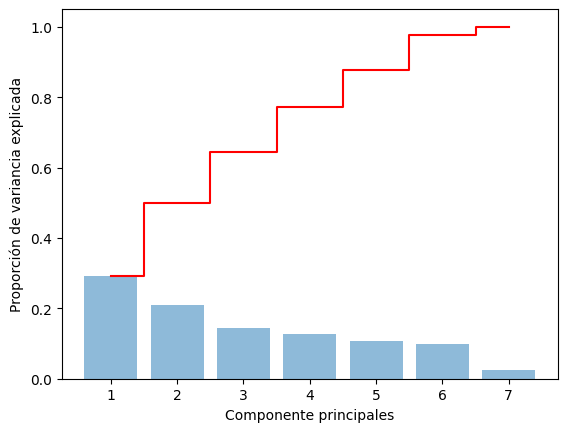

In [124]:
plt.bar(range(1,8), pca.explained_variance_ratio_,
alpha=0.5,
align='center')
plt.step(range(1,8), np.cumsum(pca.explained_variance_ratio_),
where='mid',
color='red')
plt.ylabel('Proporción de variancia explicada')
plt.xlabel('Componente principales')
plt.show()

**Criterios de selección:**
* Proporción de variancia acumulada (~75% -80%)​
* Criterio de Kaiser (eigenvalues > 1)​
* Gráfico del codo (Scree)

Las **tres primeras** componentes acumulan alrededor del 64% de la variabilidad total, es decir, **no** están cercanas a cumplir con el primer criterio (>~75%). Sin embargo, son las únicas cuyos eigenvalues son superiores a 1 (Criterio de Kaiser).

In [125]:
 pca.explained_variance_ratio_

array([0.29046451, 0.20905515, 0.14318991, 0.12781931, 0.10668969,
       0.09875725, 0.02402419])

Al seleccionar las primeras 3 componentes se llegaría a un 63% de la variabilidad total.

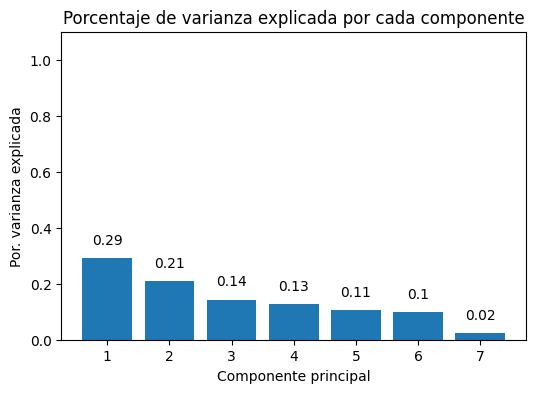

In [126]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(pca.n_components_) + 1,
    height = pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(std_data.columns)) + 1, pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

La primer componente explica el 29% de la variabilidad de los datos mientras que la segunda el 21% y la 3er el 14%. Para facilitar el gráfico en 2D solamente elegiré las dos primeras componentes

In [127]:
import plotly.express as px

# Ploteo PCA
fig = px.scatter(pca_df, x='PC1', y='PC2', color='Cultivo', title='PCA en 2D')
fig.show()


Gracias a PCA con una variabilidad del 50% de los datos (sunma de las dos primeras componentes), se puede visualizar como estan agrupados los cultivos según las componentes principales. Sin embargo las componentes no estan muy bien separadas, se superponen entre ellas.

# 4) ISOMAP

In [128]:
from sklearn.manifold import Isomap

In [129]:
isomap_df = Isomap(n_neighbors=200, n_components=3)
isomap_df.fit(std_data)
compo_isomap = isomap_df.transform(std_data)

In [130]:
isomap_plot_df = pd.DataFrame(compo_isomap, columns=['Dimension 1', 'Dimension 2', 'Dimension 3'])
isomap_plot_df['Cultivo'] = data['Cultivo']

fig = px.scatter(isomap_plot_df, x='Dimension 1', y='Dimension 2', color='Cultivo',
                  title='Isomap 2D')
fig.show()


Con 200 vecinos y 2 componentes las variables quedan muy dispersas y se superponen mucho.

In [131]:
isomap_df_2 = Isomap(n_neighbors=2, n_components=2)
isomap_df_2.fit(std_data)
compo_isomap_2 = isomap_df_2.transform(std_data)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:359: UserWarning:

The number of connected components of the neighbors graph is 30 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more eff

In [132]:
isomap_plot_df_2 = pd.DataFrame(compo_isomap_2, columns=['Dimension 1', 'Dimension 2'])
isomap_plot_df_2['Cultivo'] = data['Cultivo']

fig = px.scatter(isomap_plot_df_2, x='Dimension 1', y='Dimension 2', color='Cultivo',
                  title='Isomap 2D')
fig.show()

Al reducir los vecinos y las dimensiones ISOMAP no hace muy buen trabajo en separar las componenentes ya que se siguen superponiendo

In [133]:
isomap_df_3 = Isomap(n_neighbors=100, n_components=2)
isomap_df_3.fit(std_data)
compo_isomap_2 = isomap_df_3.transform(std_data)

In [134]:
isomap_plot_df_3 = pd.DataFrame(compo_isomap_2, columns=['Dimension 1', 'Dimension 2'])
isomap_plot_df_3['Cultivo'] = data['Cultivo']

fig = px.scatter(isomap_plot_df_3, x='Dimension 1', y='Dimension 2', color='Cultivo',
                  title='Isomap 2D')
fig.show()

 De las iteraciones probadas con ISOMAP el mejor seria el de vecinos=100 ya que es donde menos se superponen las clases y se mantiene bastante cerca a los puntos de una misma clase.

# 5) t-SNE

In [135]:
from sklearn.manifold import TSNE
import plotly.express as px

Alta perplejidad

In [215]:
tsne = TSNE(n_components=2, random_state=0, perplexity=45, n_iter=1000)
projections_tsne = tsne.fit_transform(std_data, )
fig = px.scatter(
projections_tsne, x=0, y=1, #z=2,
color=data['Cultivo'], labels={'color': 'class'}, title='t-SNE 2D con 2 componentes, 45 de perplejidad y 1000 iteraciones'
)
fig.update_traces(marker_size=5)
fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



Media Perplejidad

In [137]:
tsne_2 = TSNE(n_components=2, random_state=0, perplexity=25, n_iter=1000)
projections_tsne_2 = tsne_2.fit_transform(std_data, )
fig = px.scatter(
projections_tsne_2, x=0, y=1, #z=2,
color=data['Cultivo'], labels={'color': 'class'}, title='t-SNE 2D con 2 componentes, 25 de perplejidad y 1000 iteraciones'
)
fig.update_traces(marker_size=5)
fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



Perplejidad media y muchas iteraciones

In [138]:
tsne_2_b = TSNE(n_components=2, random_state=0, perplexity=25, n_iter=5000)
projections_tsne_2_b = tsne_2_b.fit_transform(std_data, )
fig = px.scatter(
projections_tsne_2_b, x=0, y=1, #z=2,
color=data['Cultivo'], labels={'color': 'class'}, title='t-SNE 2D con 2 componentes, 25 de perplejidad y 5000 iteraciones'
)
fig.update_traces(marker_size=5)
fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



Baja perplejidad

In [139]:
tsne_3 = TSNE(n_components=2, random_state=0, perplexity=15, n_iter=2500)
projections_tsne_3 = tsne_3.fit_transform(std_data, )
fig = px.scatter(
projections_tsne_3, x=0, y=1, #z=2,
color=data['Cultivo'], labels={'color': 'class'}, title='t-SNE 2D con 2 componentes, 15 de perplejidad y 2500 iteraciones'
)
fig.update_traces(marker_size=5)
fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



Descripción y comparación de los gráficos: El mejor resultado para t-sne es el de perplejidad media y muchas iteraciones, sin embargo el hecho de tener muchos epochs lo hace altamente costoso, por lo tanto, lo mejor sería tener una preplejidad media y pocas repeticiones ya que los datos logran separarse correctamente en un área no tan menor.

# 6 -7-8) Analisis con el subconjunto de Granada, Banana, Mango, Uva, Sandia, Melón, Manzana, Papaya y Coco

In [140]:
sub_data = data[data['Cultivo'].isin(['Granada', 'Banana', 'Mango', 'Uva', 'Sandia', 'Melon', 'Manzana', 'Papaya', 'Coco'])]

In [141]:
sub_data_numeric = sub_data.drop(columns=['Cultivo'])

In [142]:
sub_data.head()

,Nitrogeno,Fosforo,Potasio,Temperatura,Humedad,pH,Lluvia,Cultivo
500,2,24,38,24.559816,91.635362,5.922936,111.968462,Granada
501,6,18,37,19.656901,89.937010,5.937650,108.045893,Granada
502,8,26,36,18.783596,87.402477,6.804781,102.518476,Granada
503,37,18,39,24.146963,94.511066,6.424671,110.231663,Granada
504,0,27,38,22.445813,89.901470,6.738016,109.390600,Granada


In [143]:
sub_data.describe()

,Nitrogeno,Fosforo,Potasio,Temperatura,Humedad,pH,Lluvia
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,50.527778,56.154444,77.901111,26.921390,84.399961,6.189736,98.101911
std,38.068294,47.062067,65.831080,5.522282,13.234352,0.476580,49.433854
min,0.000000,5.000000,25.000000,8.825675,45.022364,4.507524,20.211267
25%,20.000000,18.000000,38.000000,23.827892,81.541165,5.851298,65.776120
50%,36.000000,30.000000,49.000000,26.837101,89.928532,6.206005,98.504082
75%,90.000000,88.000000,55.000000,29.205824,92.745985,6.527434,114.088573
max,120.000000,145.000000,205.000000,43.675493,99.981876,7.199504,248.859299


Normalizo mi nuevo data set

In [144]:
subdata_num = sub_data.drop(columns=['Cultivo'])
std_subdata = (subdata_num - subdata_num.mean()) / subdata_num.std()

In [145]:
std_subdata.describe()

,Nitrogeno,Fosforo,Potasio,Temperatura,Humedad,pH,Lluvia
count,9.000000e+02,9.000000e+02,9.000000e+02,9.000000e+02,9.000000e+02,9.000000e+02,9.000000e+02
mean,3.157968e-17,1.578984e-17,6.315935e-17,-6.315935e-17,-9.473903e-16,-6.158037e-16,-1.421085e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.327293e+00,-1.086957e+00,-8.035887e-01,-3.276855e+00,-2.975408e+00,-3.529761e+00,-1.575654e+00
25%,-8.019214e-01,-8.107261e-01,-6.061136e-01,-5.601848e-01,-2.160132e-01,-7.101404e-01,-6.539201e-01
50%,-3.816241e-01,-5.557436e-01,-4.390192e-01,-1.526352e-02,4.177440e-01,3.413595e-02,8.135531e-03
75%,1.036879e+00,6.766714e-01,-3.478769e-01,4.136757e-01,6.306334e-01,7.085854e-01,3.233950e-01
max,1.824937e+00,1.887838e+00,1.930682e+00,3.033909e+00,1.177384e+00,2.118781e+00,3.049679e+00


# PCA

In [146]:
pca1 = PCA(n_components=std_subdata.shape[1], random_state=0)

pca_features1 = pca1.fit_transform(std_subdata)

In [147]:
# PCA dataframe
pca_df1 = pd.DataFrame(
data=pca_features1,
columns=std_subdata.columns)

nuevos_nombres = {'Nitrogeno': 'PC1',
'Potasio': 'PC2',
'Fosforo': 'PC3',
'Temperatura': 'PC4',
'Humedad': 'PC5',
'pH': 'PC6',
'Lluvia': 'PC7'}
pca_df1.rename(columns=nuevos_nombres, inplace=True)

# Agrego la columna de los cultivos
pca_df1['Cultivo'] = data['Cultivo']

In [148]:
var_c1 = acumular(pca1.explained_variance_ratio_)

# Creo mi feature vector
pca_rtd1 = pd.DataFrame({'Eigenvalues':pca1.explained_variance_, 'Proporción de variancia explicada':pca1.explained_variance_ratio_, 'Proporción acumulado de variancia explicada': var_c1})

In [149]:
pca_rtd1

,Eigenvalues,Proporción de variancia explicada,Proporción acumulado de variancia explicada
0,2.298594,0.328371,0.328371
1,1.509875,0.215696,0.544067
2,1.303625,0.186232,0.730299
3,0.848694,0.121242,0.851541
4,0.636762,0.090966,0.942507
5,0.350225,0.050032,0.992539
6,0.052226,0.007461,1.000000


Los resultados son muy similares al PCA con todos los cultivos. Las primeras cuatro componentes representan el 85% de la variabilidad acumulada pero solamente las primeras 3 componenetes tienen un eigenvalue mayor a uno y al graficar en dos dimensiones, optaré por quedarme con las dos primeras componentes a pesar de que solamente expliquen el 54 % de la varianza de los datos.

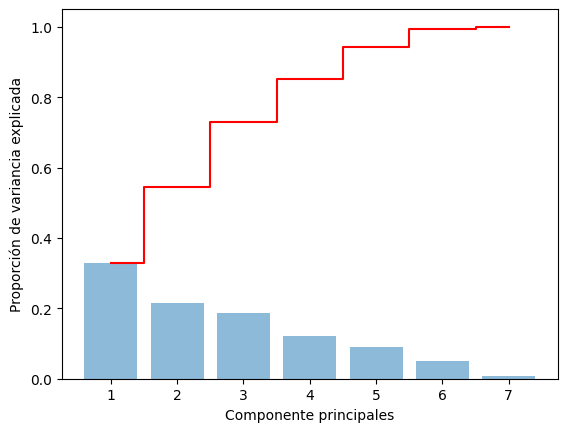

In [150]:
plt.bar(range(1,8), pca1.explained_variance_ratio_,
alpha=0.5,
align='center')
plt.step(range(1,8), np.cumsum(pca1.explained_variance_ratio_),
where='mid',
color='red')
plt.ylabel('Proporción de variancia explicada')
plt.xlabel('Componente principales')
plt.show()

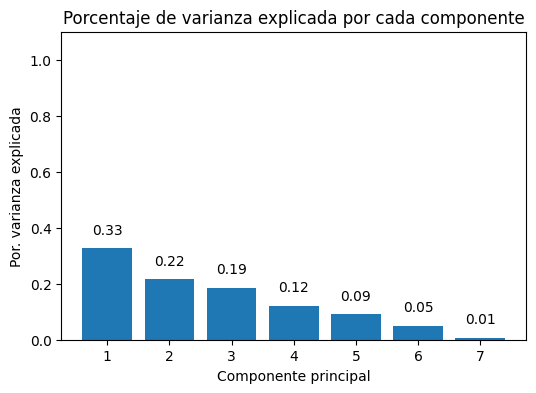

In [151]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(pca1.n_components_) + 1,
    height = pca1.explained_variance_ratio_
)

for x, y in zip(np.arange(len(std_data.columns)) + 1, pca1.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(pca1.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

Al seleccionar las primeras 3 componentes se explicaría un 74% de la variabilidad de los datos.

In [152]:
# Ploteo PCA con menos cultivos
fig = px.scatter(pca_df1, x='PC1', y='PC2', color='Cultivo', title='PCA con menos componentes en 2D')
fig.show()

Si bien al disminuir la cantidad de cultivos se observa el grafico con mas claridad, no se puede considerar muy representativo para los datos reales ya que los componenetes seleccionados explican unicamente el 74% de la vairabilidad de los datos.

# K-Means

In [153]:
from sklearn.cluster import KMeans

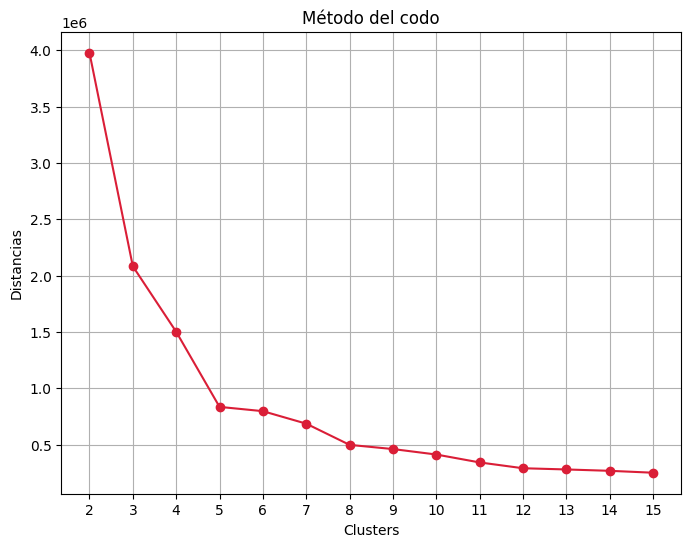

In [154]:
distancias = []
for k in range(2, 16):
  kmeans = KMeans(n_clusters=k, random_state=0)
  kmeans.fit(sub_data_numeric)
  distancias.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 16), distancias, marker='o', color = '#da1e37')
plt.title('Método del codo')
plt.xlabel('Clusters')
plt.ylabel('Distancias')
plt.xticks(np.arange(2, 16))
plt.grid(True)
plt.show(block=True)

Según el gráfico de arriba, la cantidad ideal de clusters para este problema podría ser de 5 y 6  A partir de ese número la inercia comienza a disminuir. Sin embargo, para comparar, porbaré los resultados con 4, 5 y 6 clusters

K means con k=4

In [155]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(sub_data_numeric) #Entrenamos el modelo

sub_data_numeric['Cluster KMeans'] = kmeans.labels_
sub_data_numeric.head()

,Nitrogeno,Fosforo,Potasio,Temperatura,Humedad,pH,Lluvia,Cluster KMeans
500,2,24,38,24.559816,91.635362,5.922936,111.968462,3
501,6,18,37,19.656901,89.937010,5.937650,108.045893,3
502,8,26,36,18.783596,87.402477,6.804781,102.518476,3
503,37,18,39,24.146963,94.511066,6.424671,110.231663,3
504,0,27,38,22.445813,89.901470,6.738016,109.390600,3


In [156]:
# Observo las caracteristicas de cada cluster
sub_data_numeric.groupby('Cluster KMeans').mean()

,Nitrogeno,Fosforo,Potasio,Temperatura,Humedad,pH,Lluvia
Cluster KMeans,,,,,,,
0,96.811146,40.535604,50.176471,27.556691,86.442846,6.308816,60.252621
1,21.990000,133.375000,200.000000,23.240259,87.104305,5.977800,91.133304
2,32.349206,33.976190,38.079365,30.005610,93.917618,6.284354,191.932252
3,22.832669,25.856574,36.278884,27.488770,74.838424,6.157874,105.258960


In [157]:
observaciones_por_cluster = sub_data_numeric['Cluster KMeans'].value_counts().sort_index()
observaciones_por_cluster

,count
Cluster KMeans,
0,323
1,200
2,126
3,251


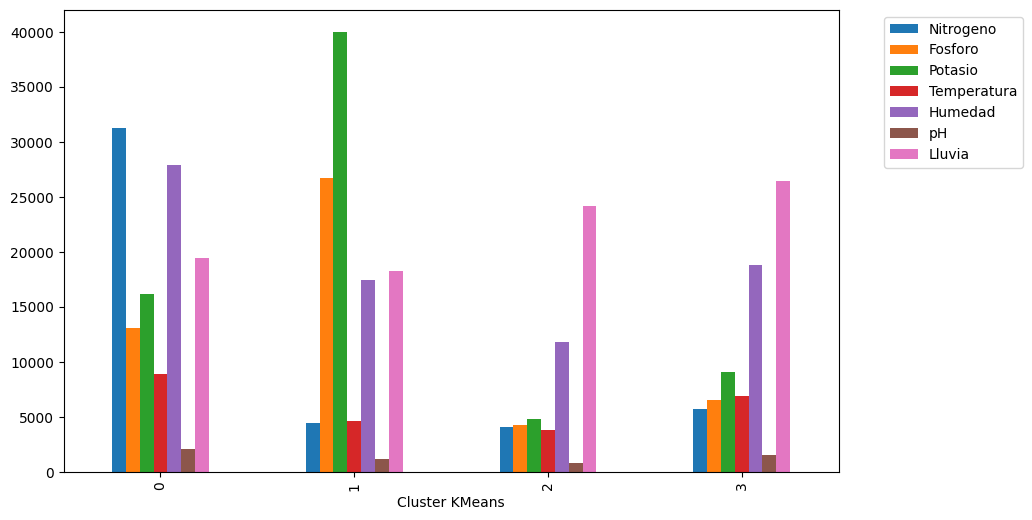

In [158]:
# Ploteo los clusters
sub_data_numeric.groupby('Cluster KMeans').sum().plot(kind='bar', figsize=(10, 6))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

El eje y muestra la suma total de los valores de las características para las observaciones dentro de cada cluster. Cada barra representa la suma acumulada de las características para un cluster específico.

k means con k = 5

In [221]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(sub_data_numeric) #Entrenamos el modelo

sub_data_numeric['Cluster KMeans'] = kmeans.labels_
sub_data_numeric.head()

,Nitrogeno,Fosforo,Potasio,Temperatura,Humedad,pH,Lluvia,Cluster KMeans
500,2,24,38,24.559816,91.635362,5.922936,111.968462,1
501,6,18,37,19.656901,89.937010,5.937650,108.045893,1
502,8,26,36,18.783596,87.402477,6.804781,102.518476,1
503,37,18,39,24.146963,94.511066,6.424671,110.231663,1
504,0,27,38,22.445813,89.901470,6.738016,109.390600,1


In [222]:
# Observo las caracteristicas de cada cluster
sub_data_numeric.groupby('Cluster KMeans').mean()

,Nitrogeno,Fosforo,Potasio,Temperatura,Humedad,pH,Lluvia
Cluster KMeans,,,,,,,
0,99.241379,17.847291,50.172414,27.254023,88.801177,6.432334,37.884202
1,20.354701,23.196581,35.076923,26.857609,73.610991,6.106692,105.593504
2,21.990000,133.375000,200.000000,23.240259,87.104305,5.977800,91.133304
3,31.408333,33.283333,37.808333,29.920453,93.962106,6.269356,194.240959
4,86.706294,75.657343,50.216783,29.185301,84.000279,6.210841,100.397002


In [223]:
observaciones_por_cluster = sub_data_numeric['Cluster KMeans'].value_counts().sort_index()
observaciones_por_cluster

,count
Cluster KMeans,
0,203
1,234
2,200
3,120
4,143


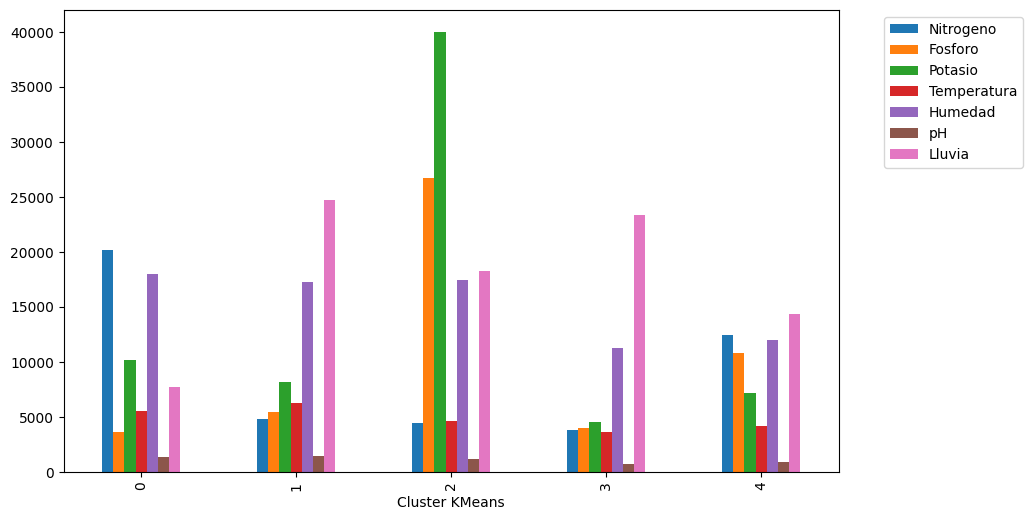

In [224]:
# Ploteo los clusters
sub_data_numeric.groupby('Cluster KMeans').sum().plot(kind='bar', figsize=(10, 6))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

In [225]:
cultivos_z_kmeans_02 = sub_data.copy()
cultivos_z_kmeans_02['Cluster KMeans'] = kmeans.labels_ # .labels_ nos dice como seteo la obersvacion

# Número de clústeres
num_clusters = 5

# Define tu propia paleta de colores discreta con suficientes colores
custom_discrete_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'] ## AREGLAR ESTO PARA QUE MUESTR EL NUMERO DEL CLUSTER

# Asignar colores discretos a cada clúster
cluster_colors = custom_discrete_colors[:num_clusters]

# Agregar una nueva columna con los colores discretos al DataFrame
cultivos_z_kmeans_02['Color'] = cultivos_z_kmeans_02["Cluster KMeans"].apply(lambda x: cluster_colors[x])

# Crear el gráfico 3D
fig_3d = px.scatter_3d(cultivos_z_kmeans_02, x='Temperatura', y='Lluvia', z='Humedad',
                        color='Color',
                        labels={'color': 'Cluster KMeans'})

# Mostrar el gráfico
fig_3d.show()

Al graficar 3 caracteristicas de 7, se puede notar que hay clusters que se encuentran dentro de una misma zona, pero se ve superposicion. Se esperaria que al agregar el resto de caracteristicas la dispersion intercluster se note mas.

K=6

In [164]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(sub_data_numeric) #Entrenamos el modelo

sub_data_numeric['Cluster KMeans'] = kmeans.labels_
sub_data_numeric.head()

,Nitrogeno,Fosforo,Potasio,Temperatura,Humedad,pH,Lluvia,Cluster KMeans
500,2,24,38,24.559816,91.635362,5.922936,111.968462,1
501,6,18,37,19.656901,89.937010,5.937650,108.045893,1
502,8,26,36,18.783596,87.402477,6.804781,102.518476,1
503,37,18,39,24.146963,94.511066,6.424671,110.231663,1
504,0,27,38,22.445813,89.901470,6.738016,109.390600,1


In [165]:
sub_data_numeric.groupby('Cluster KMeans').mean()

,Nitrogeno,Fosforo,Potasio,Temperatura,Humedad,pH,Lluvia
Cluster KMeans,,,,,,,
0,21.990000,133.375000,200.000000,23.240259,87.104305,5.977800,91.133304
1,20.695067,25.188341,36.031390,27.031205,72.503612,6.139504,100.725464
2,89.220588,76.397059,50.205882,28.956498,83.548415,6.182053,103.095987
3,99.241379,17.847291,50.172414,27.254023,88.801177,6.432334,37.884202
4,22.800000,18.122222,31.155556,27.610716,94.885536,6.003880,175.191040
5,44.375000,54.229167,47.062500,33.283872,92.539094,6.650437,210.927915


In [166]:
# Cantidad en cada cluster
bservaciones_por_cluster = sub_data_numeric['Cluster KMeans'].value_counts().sort_index()
observaciones_por_cluster

,count
Cluster KMeans,
0,244
1,130
2,200
3,203
4,123


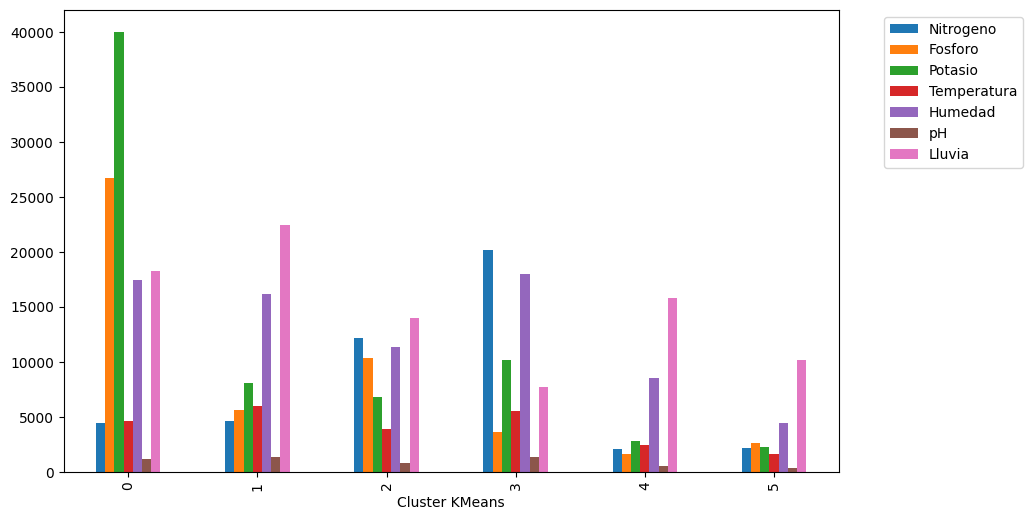

In [167]:
# Ploteo los clusters
sub_data_numeric.groupby('Cluster KMeans').sum().plot(kind='bar', figsize=(10, 6))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


In [217]:
cultivos_z_kmeans_02 = sub_data.copy()
cultivos_z_kmeans_02['Cluster KMeans'] = kmeans.labels_ # .labels_ nos dice como seteo la obersvacion

# Número de clústeres
num_clusters = 6

# Asignar el número de clúster como color
cultivos_z_kmeans_02['Color'] = cultivos_z_kmeans_02["Cluster KMeans"].astype(str)

# Crear el gráfico 3D
fig_3d = px.scatter_3d(cultivos_z_kmeans_02, x='Temperatura', y='Lluvia', z='Humedad',
                        color='Color',
                        labels={'color': 'Cluster KMeans'})

# Mostrar el gráfico
fig_3d.show()

Si bien al graficar en 3 dimensiones, k means hace un buen trabajo para dividir los clusters todavía hay algo de superposisción entre las clases sin embargo, la distribución de los puntos en el espacio es buena ya que no está tan distribuída.

# Obtener el número óptimo de clusters con GAP

In [169]:
from sklearn.metrics import silhouette_score
import numpy as np

# Calcular el Gap Statistic
def optimal_k_gap(data, k_range, B=10):
  """
  Función para calcular el Gap Statistic para encontrar el número óptimo de clusters.

  Args:
    data: Los datos para aplicar K-means.
    k_range: Un rango de valores de k para evaluar.
    B: Número de referencias para generar.

  Returns:
    Un diccionario que contiene el Gap Statistic, el valor de k óptimo y el gráfico de codo.
  """

  gap_values = []
  for k in k_range:
    # Inercia intra clusters
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data)
    original_inertia = kmeans.inertia_

    reference_inertias = []
    for _ in range(B):
      reference_data = np.random.uniform(low=data.min(), high=data.max(), size=data.shape)
      kmeans_ref = KMeans(n_clusters=k, random_state=0)
      kmeans_ref.fit(reference_data)
      reference_inertias.append(kmeans_ref.inertia_)

    gap = np.mean(np.log(reference_inertias)) - np.log(original_inertia)
    gap_values.append(gap)

  optimal_k = k_range[np.argmax(gap_values)]

  return {"gap_values": gap_values, "optimal_k": optimal_k}



El número óptimo de clusters según el Gap Statistic es: 10


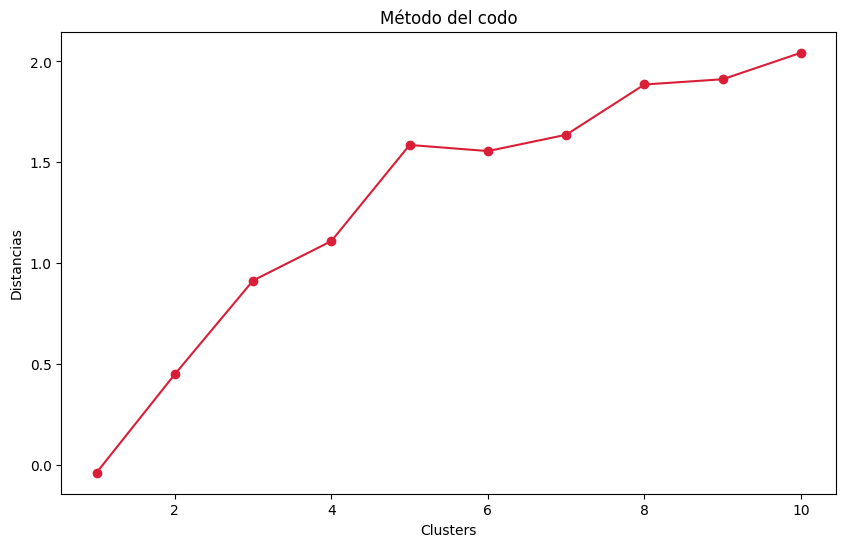

In [170]:
# Ejecutar Gap Statistic
k_range = range(1, 11)  # Rango de valores de k a probar
gap_results = optimal_k_gap(sub_data_numeric, k_range)

plt.figure(figsize=(10, 6))
plt.plot(k_range, gap_results["gap_values"], marker='o', color = '#da1e37')
plt.title('Método del codo')
plt.xlabel('Clusters')
plt.ylabel('Distancias')

# Mostrar resultados
print(f"El número óptimo de clusters según el Gap Statistic es: {gap_results['optimal_k']}")

# Aplicar K-means con el número óptimo de clusters
kmeans = KMeans(n_clusters=gap_results['optimal_k'], random_state=0)
kmeans.fit(sub_data_numeric)
sub_data_numeric['Cluster KMeans'] = kmeans.labels_


In [216]:
# Crear el gráfico en 3D
cultivos_z_kmeans_02 = sub_data.copy()
cultivos_z_kmeans_02['Cluster KMeans'] = kmeans.labels_

# Número de clústeres
num_clusters = gap_results['optimal_k']

# Asignar el número de clúster como color
cultivos_z_kmeans_02['Color'] = cultivos_z_kmeans_02["Cluster KMeans"].astype(str)

# Crear el gráfico 3D
fig_3d = px.scatter_3d(cultivos_z_kmeans_02, x='Potasio', y='Lluvia', z='Temperatura',
                        color='Color',
                        labels={'color': 'Cluster KMeans'})

# Mostrar el gráfico
fig_3d.show()

Al ajustar el valor de K ideal,segun los atributos: Temperatura, Potasio y Lluvia las clases se agrupan mucho mejor (es decir estan mejor segmentadas) y se puede observar una buena separación entre los clusters, por ejemplo dependiendo las cantidades de potasio

# 7) Clustering Jerárquico

In [172]:
import scipy.cluster.hierarchy as sch

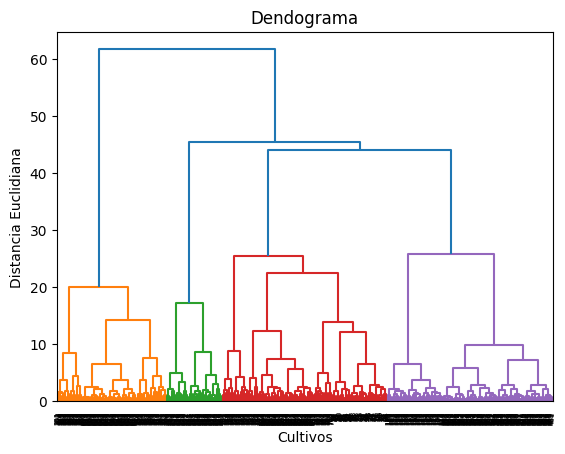

In [173]:
likage = sch.linkage(std_subdata, method='ward')
dendogrm = sch.dendrogram(likage)

plt.title('Dendograma')
plt.xlabel('Cultivos')
plt.ylabel('Distancia Euclidiana')
plt.show(block=True)

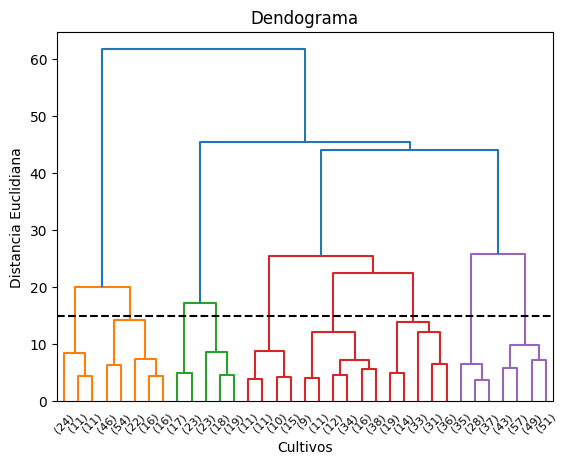

In [186]:
dendogrm = sch.dendrogram(likage, truncate_mode='lastp', p=35)
plt.title('Dendograma')
plt.axhline(y=15, c='k', linestyle='dashed')
plt.xlabel('Cultivos')
plt.ylabel('Distancia Euclidiana')
plt.show(block=True)

Un k=9 hace una buena agrupación de los datos ya que a esa altura en el gráfico de arriba no se densifica la ramificación.

In [187]:
# Silhoutte
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

In [204]:
n_clusters = 9
cluster = AgglomerativeClustering(n_clusters=n_clusters)

jerarq = cluster.fit_predict(std_subdata)

score = silhouette_score(std_subdata, jerarq)

In [207]:
std_subdata['Cluster Jerarquico'] = jerarq
std_subdata.head()

,Nitrogeno,Fosforo,Potasio,Temperatura,Humedad,pH,Lluvia,Cluster Jerarquico
500,-1.274756,-0.683235,-0.606114,-0.427645,0.546714,-0.559824,0.280507,1
501,-1.169681,-0.810726,-0.621304,-1.315487,0.418385,-0.528950,0.201157,1
502,-1.117144,-0.640738,-0.636494,-1.473629,0.226873,1.290539,0.089343,1
503,-0.355356,-0.810726,-0.590923,-0.502406,0.764005,0.492959,0.245373,1
504,-1.327293,-0.619489,-0.606114,-0.810458,0.415699,1.150448,0.228359,1


In [208]:
print(f'Silhoutte score con 6 clusters es de {score}')

Silhoutte score con 6 clusters es de 0.5794284892292073


El valor está mas cercano a 1 por lo que significaría que es un buen agrupamiento.

In [226]:
# Grafico en 3D
cultivos_z_jerarq_02 = sub_data.copy()
cultivos_z_jerarq_02['Cluster Jerarquico'] = jerarq

fig_3d = px.scatter_3d(cultivos_z_jerarq_02, x='Temperatura', y='Lluvia', z='Humedad',
                        color='Cluster Jerarquico',
                        labels={'color': 'Cluster Jerarquico'})

fig_3d.show()

# Conclusión - Problema de los cultivos.


El mejor de todos los algortimos de clustering fue el de TSNE, donde las clases estan bien agrupadas no muy distribuídas en el plano.

Comenzando por PCA, de 7 dimensiones logra concetralas principalmente en 4. Sus primeras 3 componenetes principales brindan alrededor del 70% de la información, sin embargo al graficar en dos dimensiones la variabilidad observada se reduce al 50% de los datos por lo que su gráfica no me brinda información tan relacionada al problema.

Luego, en ISOMAP se observa como los cultivos de las manzanas y las uva se acercan demasiado, esto se debe a que los valores de los fertilizantes para la mismas variables son similares. Un número bajo de vecinos, no es eficiente para agrupar las clases. Si bien el múmero mas alto probado de vecinos fue de 200, se puede observar una gran mejora a la hora de clusterizar los cultivos en comparación al gráfico de pocos vecinos.

Luego, en t-SNE los cultivos se agrupar de mejor manera sobre todo el gráfico. El mejor resultado en cuanto a costo computacional y perplejidad es el de 1000 iteraciones con 25 de perplejidad ya que se logran resultados muy parecidos a los de muchas iteraciones (5000) y poca perplejidad y tambien a los de baja  perplejidad con bajas iteraciones.

Por último, en el clustering, ambos algoritmos (clustering jerárquico y K-means) nos daban un óptimo de 9/10 clusters por lo que se puede inferir, representado en el último gráfico que cultivos se siguen de algún tipo de patrón.